In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"

In [ ]:
import numpy as np
import pandas as pd
import random
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set_style('darkgrid')

def seed_everything(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.use_deterministic_algorithms(True)

seed_everything()

In [3]:
DATASET_DIR = "/kaggle/input/animals10/raw-img"  # adjust as needed
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
def convert_path_to_df(dataset):
    image_dir = Path(dataset)
    # Look for multiple image extensions
    filepaths = list(image_dir.glob('**/*.JPG')) + list(image_dir.glob('**/*.jpg')) + \
                list(image_dir.glob('**/*.jpeg')) + list(image_dir.glob('**/*.PNG'))
    # Assume the parent folder name is the label
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df(DATASET_DIR)

# Create a numeric label column
unique_labels = sorted(image_df['Label'].unique())


In [4]:
image_df.head()

,Filepath,Label
0,/kaggle/input/animals10/raw-img/pecora/eb31b90...,pecora
1,/kaggle/input/animals10/raw-img/pecora/eb36b80...,pecora
2,/kaggle/input/animals10/raw-img/pecora/ea37b10...,pecora
3,/kaggle/input/animals10/raw-img/pecora/eb3db10...,pecora
4,/kaggle/input/animals10/raw-img/pecora/ea36b70...,pecora


In [5]:
print(unique_labels)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [6]:
label_mapping = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel'
}
unique_labels = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']
# Assuming your DataFrame is named 'df' and the column with labels is 'Label'
image_df['Label'] = image_df['Label'].map(label_mapping)

In [7]:
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}
image_df['Label_idx'] = image_df['Label'].map(label_to_idx)

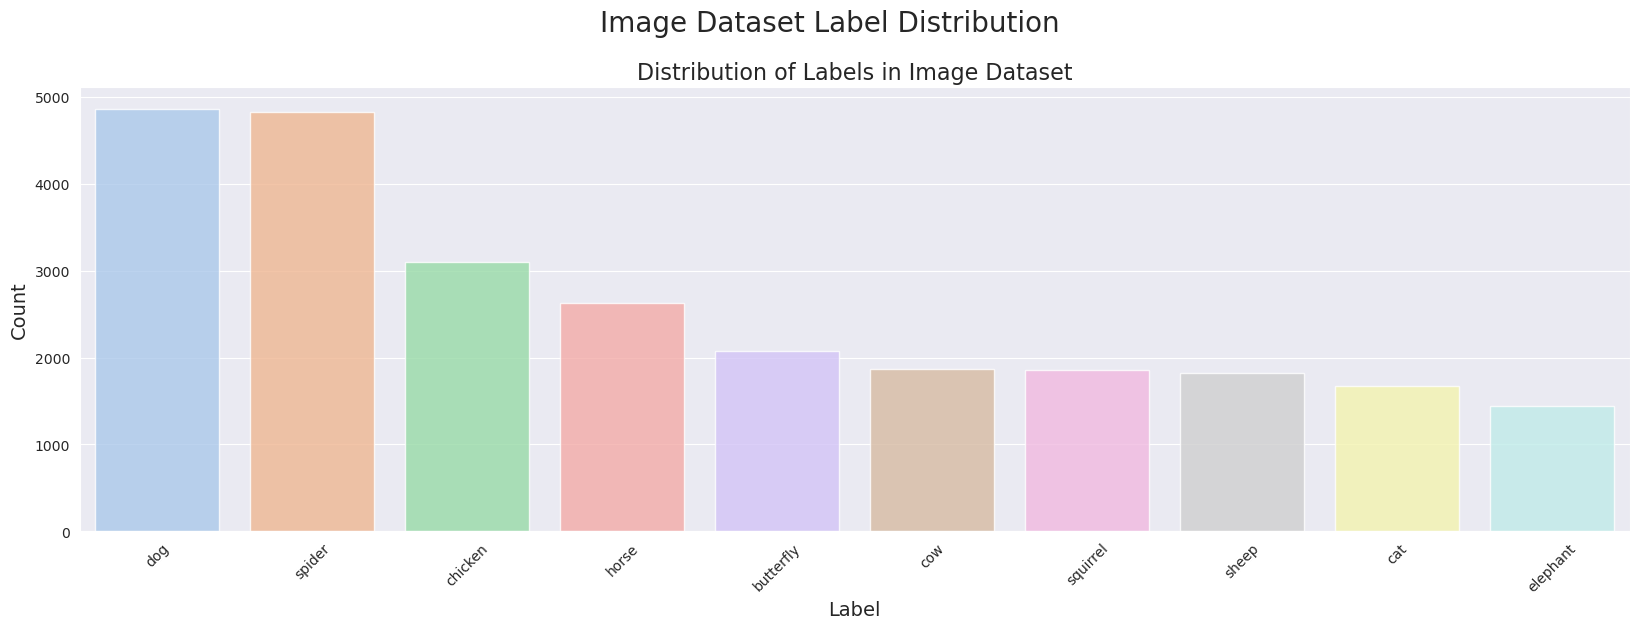

In [8]:
import PIL
from PIL import UnidentifiedImageError, Image

for img_p in Path(DATASET_DIR).rglob("*.jpg"):
    try:
        img = PIL.Image.open(img_p)
    except UnidentifiedImageError:
        print(f'Could not identify image: {img_p}')

# %%
# Get the value counts for each label and plot distribution
label_counts = image_df['Label'].value_counts()

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='pastel', ax=ax)
ax.set_title('Distribution of Labels in Image Dataset', fontsize=16)
ax.set_xlabel('Label', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(label_counts.index, rotation=45)
fig.suptitle('Image Dataset Label Distribution', fontsize=20)
fig.subplots_adjust(top=0.85)
plt.show()


i didn't really adress class imbalance anywhere in code :( not the best practice

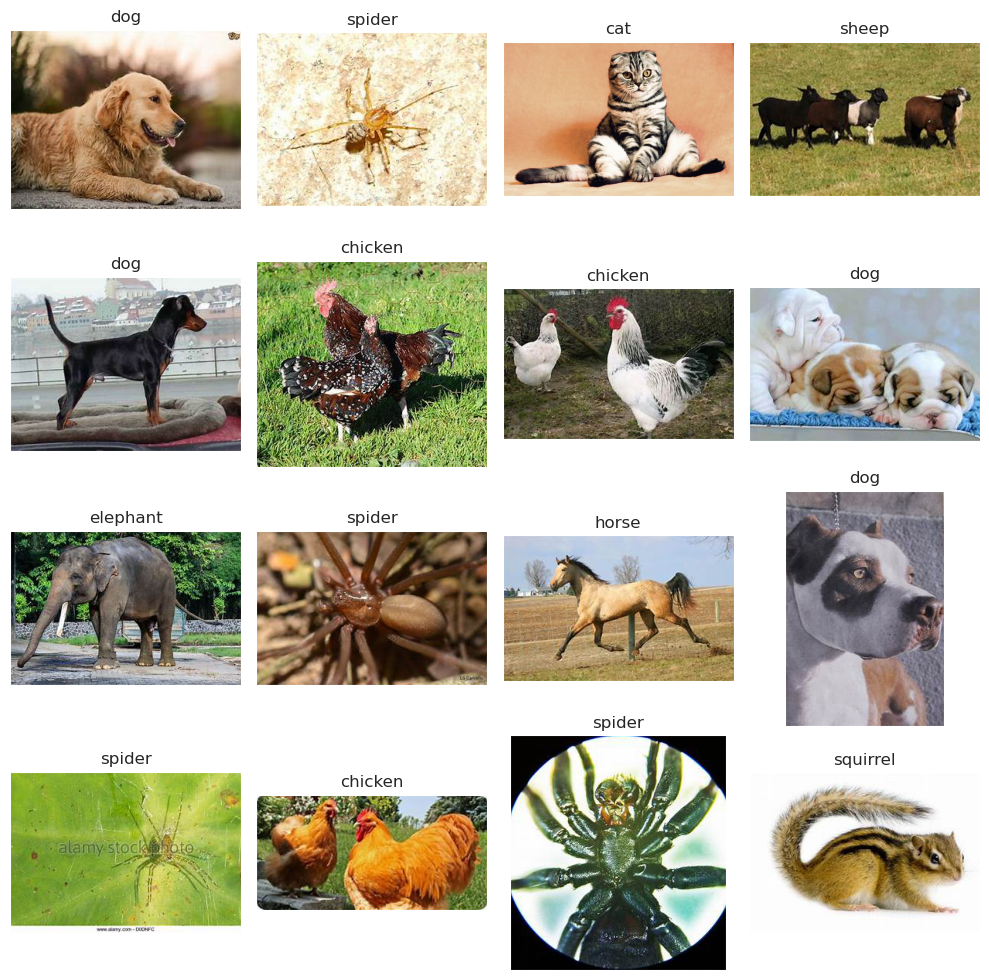

In [9]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()